In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet("./../../../resulting data/verses_features.parquet")

In [3]:
df.head()

bible_identifier bible_book bible_chapter bible_book_chapter       genre  \
0    b.GEN.001.001        GEN           001            GEN.001  historical   
1    b.GEN.001.002        GEN           001            GEN.001  historical   
2    b.GEN.001.003        GEN           001            GEN.001  historical   
3    b.GEN.001.004        GEN           001            GEN.001  historical   
4    b.GEN.001.005        GEN           001            GEN.001  historical   

   twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
0                       49268              26376              22892   
1                        8601               3693               4908   
2                       20970               8816              12154   
3                        4222               2286               1936   
4                        3208               1666               1542   

   relations  monogamy  ...  #org35  #org439  #pla65  #pla68  #per116  \
0          0         0  ...     NaN      NaN     NaN     NaN      NaN   
1          0         0  ...     NaN      NaN     NaN     NaN      NaN   
2          0         0  ...     NaN      NaN     NaN     NaN      NaN   
3          0         0  ...     NaN      NaN     NaN     NaN      NaN   
4          0         0  ...     NaN      NaN     NaN     NaN      NaN   

   #per119  #pla67  #org52  #per129  #pla74  
0      NaN     NaN     NaN      NaN     NaN  
1      NaN     NaN     NaN      NaN     NaN  
2      NaN     NaN     NaN      NaN     NaN  
3      NaN     NaN     NaN      NaN     NaN  
4      NaN     NaN     NaN      NaN     NaN  

[5 rows x 4167 columns]

In [4]:
df["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.columns.tolist()[0:10]

['bible_identifier',
 'bible_book',
 'bible_chapter',
 'bible_book_chapter',
 'genre',
 'twitter_freq_sum_2014_2015',
 'twitter_freq_2014',
 'twitter_freq_2015',
 'relations',
 'monogamy']

In [7]:
structural_features = df.columns.tolist()[265:297]


In [8]:
sexual_features = df.columns.tolist()[8:262]

In [9]:
len(df)

31065

In [10]:
entities_features = df.columns.tolist()[262:265] + df.columns.tolist()[298:len(df)]

In [11]:
df.loc[df["bible_identifier"] == "b.SON.001.010"]["#per39"]

17547    1.0
Name: #per39, dtype: float64

In [12]:
df.describe()

twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
count                31065.000000       31065.000000       31065.000000   
mean                  2286.298793        1366.727797         919.570996   
std                  12282.503644        8274.810650        4428.844891   
min                      0.000000           0.000000           0.000000   
25%                     72.000000          32.000000          37.000000   
50%                    239.000000         115.000000         117.000000   
75%                    941.000000         507.000000         415.000000   
max                 875311.000000      613161.000000      262150.000000   

          relations      monogamy      poligamy      marriage  \
count  31065.000000  31065.000000  31065.000000  31065.000000   
mean       0.000225      0.000193      0.000515      0.001610   
std        0.015010      0.013896      0.022689      0.040087   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000   

       second-marriage  second-marriage-divorce  second-marriage-widow  ...  \
count     31065.000000                  31065.0           31065.000000  ...   
mean          0.000064                      0.0               0.000032  ...   
std           0.008024                      0.0               0.005674  ...   
min           0.000000                      0.0               0.000000  ...   
25%           0.000000                      0.0               0.000000  ...   
50%           0.000000                      0.0               0.000000  ...   
75%           0.000000                      0.0               0.000000  ...   
max           1.000000                      0.0               1.000000  ...   

             #org35       #org439        #pla65        #pla68       #per116  \
count  31065.000000  31065.000000  31065.000000  31065.000000  31065.000000   
mean       0.000418      0.000064      0.000032      0.000032      0.000064   
std        0.030551      0.008024      0.005674      0.005674      0.011347   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      1.000000      1.000000      1.000000      2.000000   

            #per119        #pla67        #org52       #per129        #pla74  
count  31065.000000  31065.000000  31065.000000  31065.000000  31065.000000  
mean       0.000097      0.000032      0.000869      0.000129      0.000032  
std        0.017021      0.005674      0.034501      0.022695      0.005674  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000      0.000000  
max        3.000000      1.000000      3.000000      4.000000      1.000000  

[8 rows x 4162 columns]

In [13]:
books_df = df.groupby("bible_book").sum()

In [14]:
books_df

twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
bible_book                                                                     
1CH                             244312             123407             120905   
1CO                            2658801            1637393            1021408   
1JO                            1595001            1043423             551578   
1KI                             225574             118378             107196   
1PE                            1325301             853718             471583   
...                                ...                ...                ...   
RUT                              27430              11254              16176   
SON                              68811              35096              33715   
TIT                             172005             107460              64545   
ZEC                              88451              43537              44914   
ZEP                              47430              24359              23071   

            relations  monogamy  poligamy  marriage  second-marriage  \
bible_book                                                             
1CH                 0         0         0         0                0   
1CO                 7         0         0        16                2   
1JO                 0         0         0         0                0   
1KI                 0         0         0         0                0   
1PE                 0         0         0         0                0   
...               ...       ...       ...       ...              ...   
RUT                 0         2         0         5                0   
SON                 0         0         1         0                0   
TIT                 0         0         0         0                0   
ZEC                 0         0         0         0                0   
ZEP                 0         0         0         0                0   

            second-marriage-divorce  second-marriage-widow  ...  #org35  \
bible_book                                                  ...           
1CH                               0                      0  ...     0.0   
1CO                               0                      1  ...     0.0   
1JO                               0                      0  ...     0.0   
1KI                               0                      0  ...     0.0   
1PE                               0                      0  ...     0.0   
...                             ...                    ...  ...     ...   
RUT                               0                      0  ...     0.0   
SON                               0                      0  ...     0.0   
TIT                               0                      0  ...     0.0   
ZEC                               0                      0  ...     0.0   
ZEP                               0                      0  ...     0.0   

            #org439  #pla65  #pla68  #per116  #per119  #pla67  #org52  \
bible_book                                                              
1CH             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
1CO             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
1JO             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
1KI             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
1PE             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
...             ...     ...     ...      ...      ...     ...     ...   
RUT             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
SON             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
TIT             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
ZEC             0.0     0.0     0.0      0.0      0.0     0.0     0.0   
ZEP             0.0     0.0     0.0      0.0      0.0     0.0     0.0   

            #per129  #pla74  
bible_book                   
1CH             0.0     0.0  
1CO             0.

In [15]:
books_df["number of verses"] = df.groupby("bible_book").count().iloc[:,0].values.tolist()


In [16]:
books_df = books_df.loc[df["bible_book"].unique()]


In [17]:
books_df

twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
bible_book                                                                     
GEN                             938570             467676             470894   
EXO                             532548             256961             275587   
LEV                             206505              91530             114975   
NUM                             191596              95279              96317   
DEU                             568536             335272             233264   
...                                ...                ...                ...   
1JO                            1595001            1043423             551578   
2JO                              23028              14143               8885   
3JO                              48185              27678              20507   
JUD                             108944              71516              37428   
REV                            1197739             589364             608375   

            relations  monogamy  poligamy  marriage  second-marriage  \
bible_book                                                             
GEN                 0         1        10        18                0   
EXO                 0         0         0         0                0   
LEV                 0         0         0         0                0   
NUM                 0         0         0         0                0   
DEU                 0         0         0         0                0   
...               ...       ...       ...       ...              ...   
1JO                 0         0         0         0                0   
2JO                 0         0         0         0                0   
3JO                 0         0         0         0                0   
JUD                 0         0         0         0                0   
REV                 0         0         0         0                0   

            second-marriage-divorce  second-marriage-widow  ...  #org439  \
bible_book                                                  ...            
GEN                               0                      0  ...      0.0   
EXO                               0                      0  ...      0.0   
LEV                               0                      0  ...      0.0   
NUM                               0                      0  ...      0.0   
DEU                               0                      0  ...      0.0   
...                             ...                    ...  ...      ...   
1JO                               0                      0  ...      0.0   
2JO                               0                      0  ...      0.0   
3JO                               0                      0  ...      0.0   
JUD                               0                      0  ...      0.0   
REV                               0                      0  ...      2.0   

            #pla65  #pla68  #per116  #per119  #pla67  #org52  #per129  #pla74  \
bible_book                                                                      
GEN            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
EXO            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
LEV            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
NUM            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
DEU            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
...            ...     ...      ...      ...     ...     ...      ...     ...   
1JO            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
2JO            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
3JO            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
JUD            0.0     0.0      0.0      0.0     0.0     0.0      0.0     0.0   
REV            1.0     1.0      2.0      3.0     1.0    27.0      4.0    

In [18]:
rel_books_df = books_df.div(books_df["number of verses"], axis="index")

In [19]:
rel_books_df

twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
bible_book                                                                     
GEN                         612.243966         305.072407         307.171559   
EXO                         439.033800         211.839242         227.194559   
LEV                         240.401630         106.554133         133.847497   
NUM                         148.754658          73.974379          74.780280   
DEU                         592.842544         349.605839         243.236705   
...                                ...                ...                ...   
1JO                       15190.485714        9937.361905        5253.123810   
2JO                        1771.384615        1087.923077         683.461538   
3JO                        3441.785714        1977.000000        1464.785714   
JUD                        4357.760000        2860.640000        1497.120000   
REV                        2964.700495        1458.821782        1505.878713   

            relations  monogamy  poligamy  marriage  second-marriage  \
bible_book                                                             
GEN               0.0  0.000652  0.006523  0.011742              0.0   
EXO               0.0  0.000000  0.000000  0.000000              0.0   
LEV               0.0  0.000000  0.000000  0.000000              0.0   
NUM               0.0  0.000000  0.000000  0.000000              0.0   
DEU               0.0  0.000000  0.000000  0.000000              0.0   
...               ...       ...       ...       ...              ...   
1JO               0.0  0.000000  0.000000  0.000000              0.0   
2JO               0.0  0.000000  0.000000  0.000000              0.0   
3JO               0.0  0.000000  0.000000  0.000000              0.0   
JUD               0.0  0.000000  0.000000  0.000000              0.0   
REV               0.0  0.000000  0.000000  0.000000              0.0   

            second-marriage-divorce  second-marriage-widow  ...  #org439  \
bible_book                                                  ...            
GEN                             0.0                    0.0  ...  0.00000   
EXO                             0.0                    0.0  ...  0.00000   
LEV                             0.0                    0.0  ...  0.00000   
NUM                             0.0                    0.0  ...  0.00000   
DEU                             0.0                    0.0  ...  0.00000   
...                             ...                    ...  ...      ...   
1JO                             0.0                    0.0  ...  0.00000   
2JO                             0.0                    0.0  ...  0.00000   
3JO                             0.0                    0.0  ...  0.00000   
JUD                             0.0                    0.0  ...  0.00000   
REV                             0.0                    0.0  ...  0.00495   

              #pla65    #pla68  #per116   #per119    #pla67    #org52  \
bible_book                                                              
GEN         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
EXO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
LEV         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
NUM         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
DEU         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
...              ...       ...      ...       ...       ...       ...   
1JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
2JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
3JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
JUD         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
REV         0.002475  0.002475  0.00495  0.007426  0.002475  0.066832   

             #per129    #pla74  number of verses  
bible_book                                  

In [20]:
entities_df = pd.read_excel("./../../../entities.xls")


In [21]:
entities_df.index = entities_df["id"]


In [22]:
[entity for entity in rel_books_df.loc["SON"][entities_features].sort_values(ascending=False)[0:100].index.tolist() if ("org" in entity or "per" in entity ) and "per0" not in entity ]

['#per1876',
 '#per39',
 '#org391',
 '#org0',
 '#org122',
 '#org24',
 '#per1877',
 '#org100',
 '#org150',
 '#org21',
 '#per35',
 '#org183',
 '#org70',
 '#per779',
 '#per600',
 '#org174',
 '#org218',
 '#per1021',
 '#per997',
 '#per1016',
 '#per1013',
 '#org140',
 '#per650',
 '#org232',
 '#org172',
 '#per1018',
 '#per938']

# Visualizations

In [23]:
rel_books_df

twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
bible_book                                                                     
GEN                         612.243966         305.072407         307.171559   
EXO                         439.033800         211.839242         227.194559   
LEV                         240.401630         106.554133         133.847497   
NUM                         148.754658          73.974379          74.780280   
DEU                         592.842544         349.605839         243.236705   
...                                ...                ...                ...   
1JO                       15190.485714        9937.361905        5253.123810   
2JO                        1771.384615        1087.923077         683.461538   
3JO                        3441.785714        1977.000000        1464.785714   
JUD                        4357.760000        2860.640000        1497.120000   
REV                        2964.700495        1458.821782        1505.878713   

            relations  monogamy  poligamy  marriage  second-marriage  \
bible_book                                                             
GEN               0.0  0.000652  0.006523  0.011742              0.0   
EXO               0.0  0.000000  0.000000  0.000000              0.0   
LEV               0.0  0.000000  0.000000  0.000000              0.0   
NUM               0.0  0.000000  0.000000  0.000000              0.0   
DEU               0.0  0.000000  0.000000  0.000000              0.0   
...               ...       ...       ...       ...              ...   
1JO               0.0  0.000000  0.000000  0.000000              0.0   
2JO               0.0  0.000000  0.000000  0.000000              0.0   
3JO               0.0  0.000000  0.000000  0.000000              0.0   
JUD               0.0  0.000000  0.000000  0.000000              0.0   
REV               0.0  0.000000  0.000000  0.000000              0.0   

            second-marriage-divorce  second-marriage-widow  ...  #org439  \
bible_book                                                  ...            
GEN                             0.0                    0.0  ...  0.00000   
EXO                             0.0                    0.0  ...  0.00000   
LEV                             0.0                    0.0  ...  0.00000   
NUM                             0.0                    0.0  ...  0.00000   
DEU                             0.0                    0.0  ...  0.00000   
...                             ...                    ...  ...      ...   
1JO                             0.0                    0.0  ...  0.00000   
2JO                             0.0                    0.0  ...  0.00000   
3JO                             0.0                    0.0  ...  0.00000   
JUD                             0.0                    0.0  ...  0.00000   
REV                             0.0                    0.0  ...  0.00495   

              #pla65    #pla68  #per116   #per119    #pla67    #org52  \
bible_book                                                              
GEN         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
EXO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
LEV         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
NUM         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
DEU         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
...              ...       ...      ...       ...       ...       ...   
1JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
2JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
3JO         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
JUD         0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
REV         0.002475  0.002475  0.00495  0.007426  0.002475  0.066832   

             #per129    #pla74  number of verses  
bible_book                                  

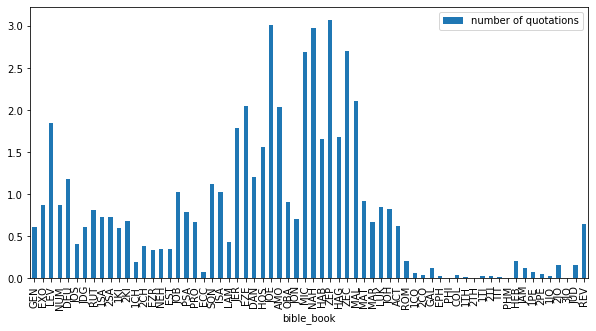

In [24]:
rel_books_df.plot(kind="bar", y=['number of quotations'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020342481E88>,
      dtype=object)

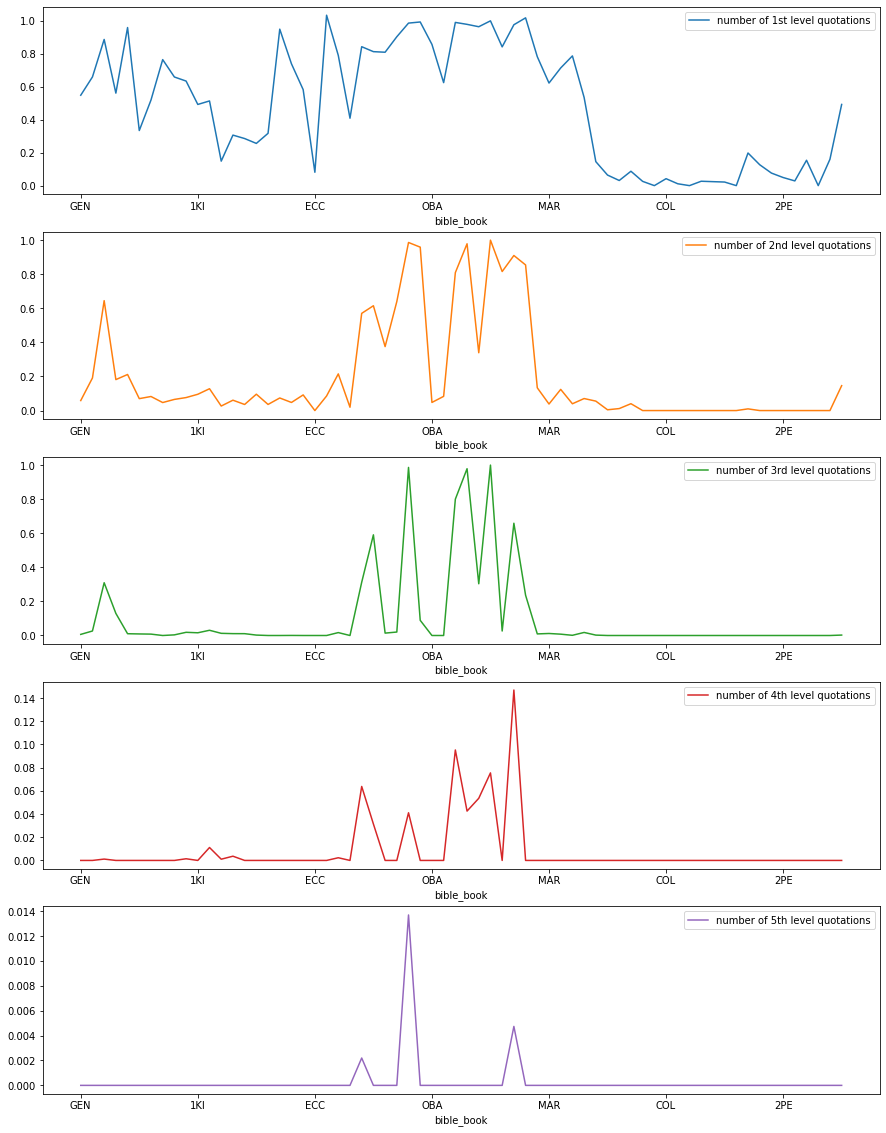

In [25]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,20))

#quantitative_data.plot(kind="bar", x ="id", y = 'number verses', rot=90, figsize=(15,10), ax=axes[0])
#quantitative_data.plot(kind="bar", x ="id", y = 'number chapters', rot=90, figsize=(15,10), ax=axes[1])

rel_books_df.plot(kind="line", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], subplots=True, ax=axes)



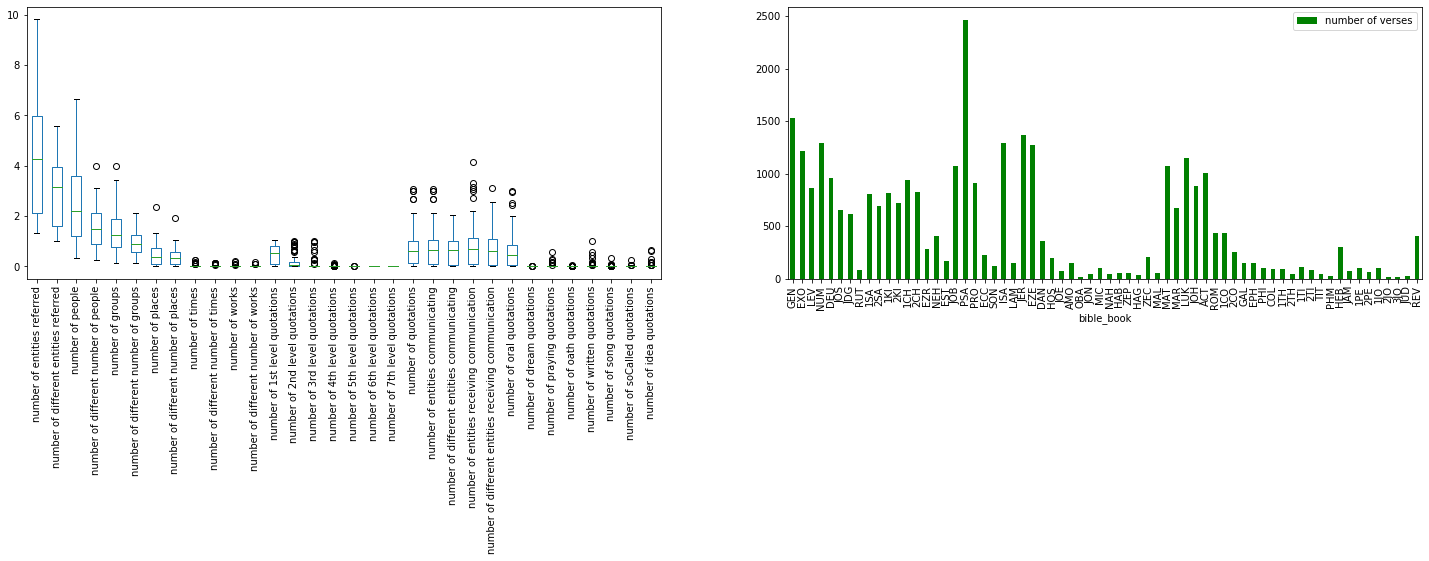

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,5))

rel_books_df[structural_features].plot.box(rot=90, ax=axes[0])
books_df.plot(kind="bar", y="number of verses", color="green", ax=axes[1])

#fig.savefig("./fig.png")

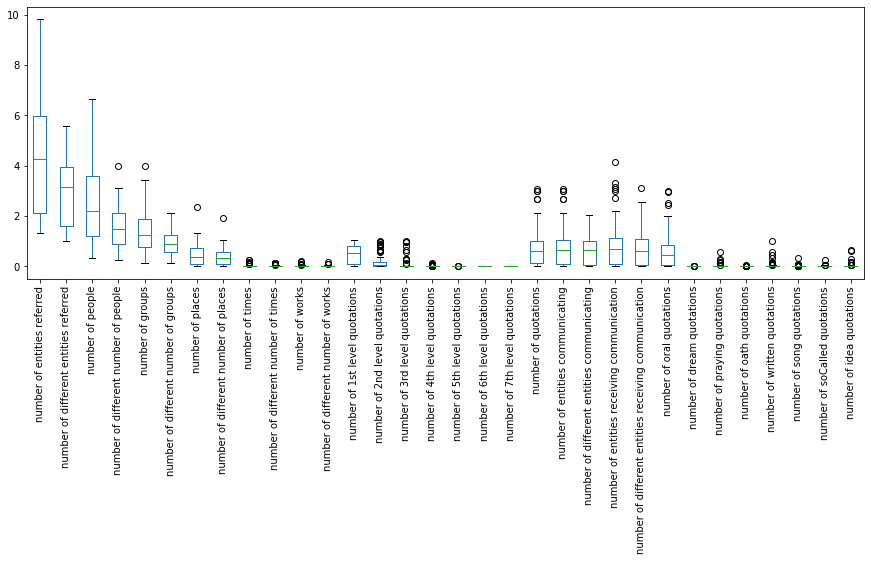

In [27]:
rel_books_df[structural_features].plot.box(rot=90, figsize=(15,5))


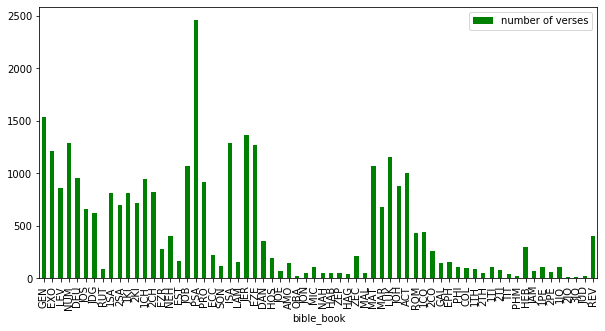

In [28]:
books_df.plot(kind="bar", y="number of verses", color="green",figsize=(10,5))

In [29]:
structural_features

['number of entities referred',
 'number of different entities referred',
 'number of people',
 'number of different number of people',
 'number of groups',
 'number of different number of groups',
 'number of places',
 'number of different number of places',
 'number of times',
 'number of different number of times',
 'number of works',
 'number of different number of works',
 'number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations',
 'number of 6th level quotations',
 'number of 7th level quotations',
 'number of quotations',
 'number of entities communicating',
 'number of different entities communicating',
 'number of entities receiving communication',
 'number of different entities receiving communication',
 'number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'num

In [30]:
rel_books_df[["number of people","number of groups", "number of places"]]

number of people  number of groups  number of places
bible_book                                                      
GEN                 3.680365          0.685584          0.523810
EXO                 2.701566          1.160758          0.436933
LEV                 3.753201          1.882421          0.350407
NUM                 2.781832          2.087733          0.623447
DEU                 2.349322          2.440042          0.759124
...                      ...               ...               ...
1JO                 1.561905          0.752381          0.019048
2JO                 1.153846          1.000000          0.000000
3JO                 0.785714          0.714286          0.000000
JUD                 1.600000          1.120000          0.280000
REV                 1.628713          1.683168          0.393564

[66 rows x 3 columns]

<function matplotlib.pyplot.show(*args, **kw)>

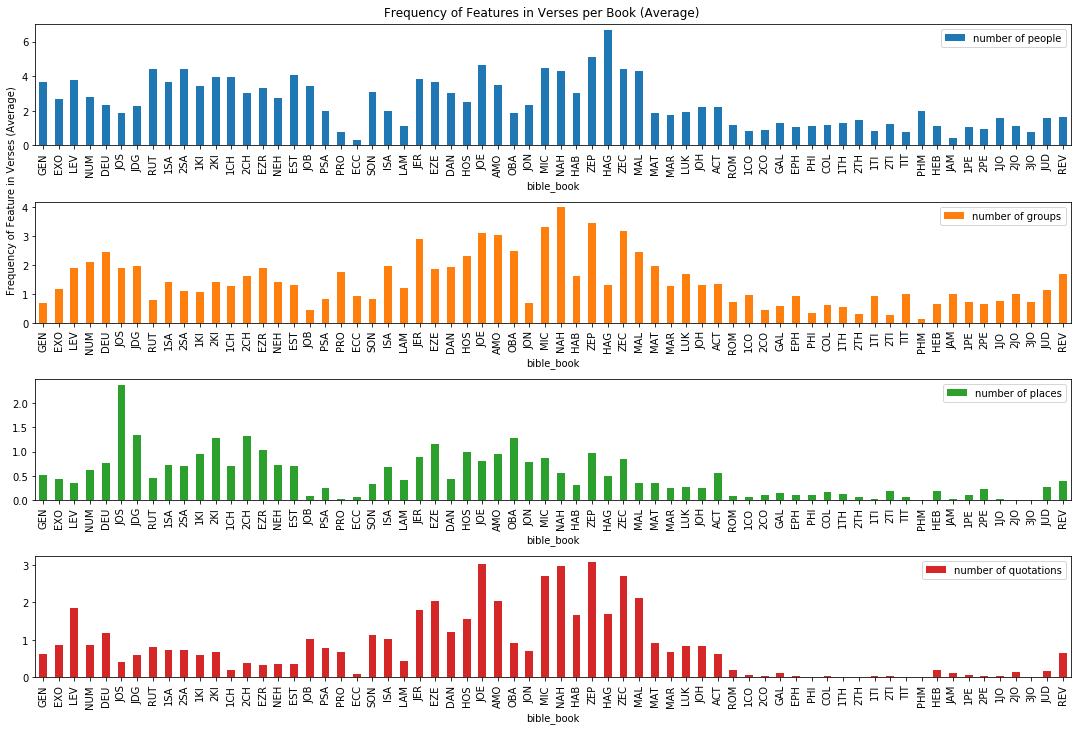

In [31]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

rel_books_df.plot(kind = "bar", y = ["number of people","number of groups", "number of places", "number of quotations"], ax = axes, subplots = True,  legend=True, title = ["", "", "", ""])

#rel_books_df.plot(kind="bar", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes)
#relative_quantitative_data.plot(kind="bar", x="id", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes[1])
#fig.set_title

#axes.set_ylabel('yA')

fig.suptitle('Frequency of Features in Verses per Book (Average)', y = 1.01)
#fig.subplots_adjust(hspace=0.5, left=0.5)
fig.text(0.01, 0.9, "Frequency of Feature in Verses (Average)", ha="center", va="top", rotation=90)

axes.set_ylabel("Life expectancy at birth")

#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

#axes[1].title.set_text('First Plot')

#axes[1].set_title = "Number of different entities in each book of the Bible (relative to number of verses)"



plt.subplots_adjust(top = 0.9, left = 0.05, bottom = 0.15)  

plt.tight_layout()

fig.savefig("./../../../visualizations/features/bar_people_groups_places_quotations_bible.png", bbox_inches="tight")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

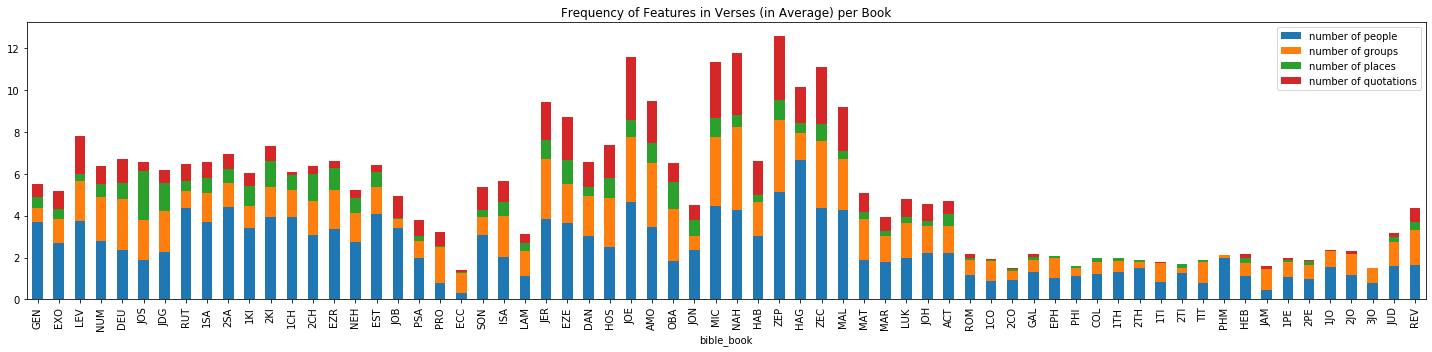

In [32]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

rel_books_df.plot(kind="bar", y=["number of people","number of groups", "number of places", "number of quotations"], figsize=(20,5), ax=axes, stacked=True)

#rel_books_df.plot(kind="bar", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes)
#relative_quantitative_data.plot(kind="bar", x="id", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes[1])
#fig.set_title

axes.title.set_text('Frequency of Features in Verses (in Average) per Book')
#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

#axes[1].title.set_text('First Plot')

#axes[1].set_title = "Number of different entities in each book of the Bible (relative to number of verses)"
plt.tight_layout()

#fig.savefig("./fig.png")
fig.savefig("./../../../visualizations/features/stacked_bar_people_groups_places_quotations_bible.png")
plt.show



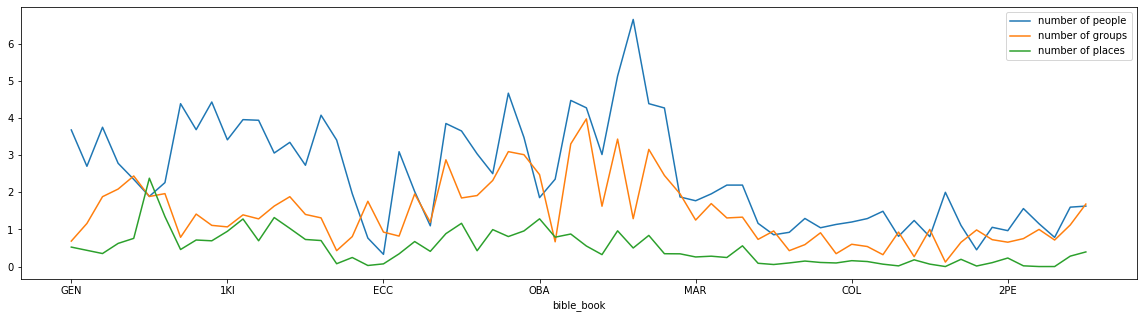

In [33]:
rel_books_df.plot(kind="line",  y=["number of people","number of groups", "number of places"], figsize=(20,5))

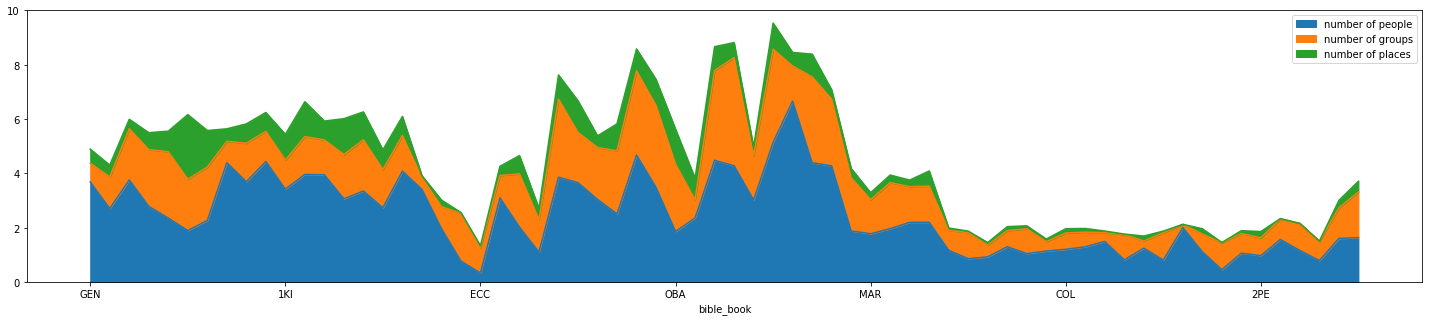

In [34]:
rel_books_df.plot(kind="area", y=["number of people","number of groups", "number of places"], figsize=(25,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203443CEE88>],
      dtype=object)

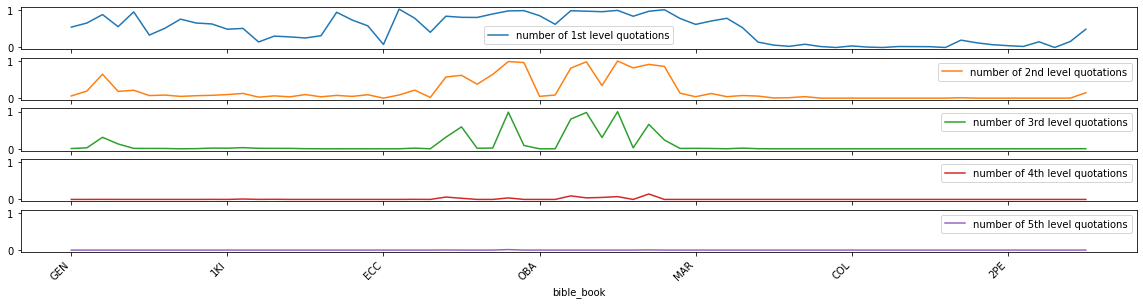

In [35]:
rel_books_df.plot(kind="line", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], figsize=(20,5), rot=45, subplots=True, sharey = True, layout = (5, 1), x_compat=True)
#plt.xticks(relative_quantitative_data["id"].tolist())

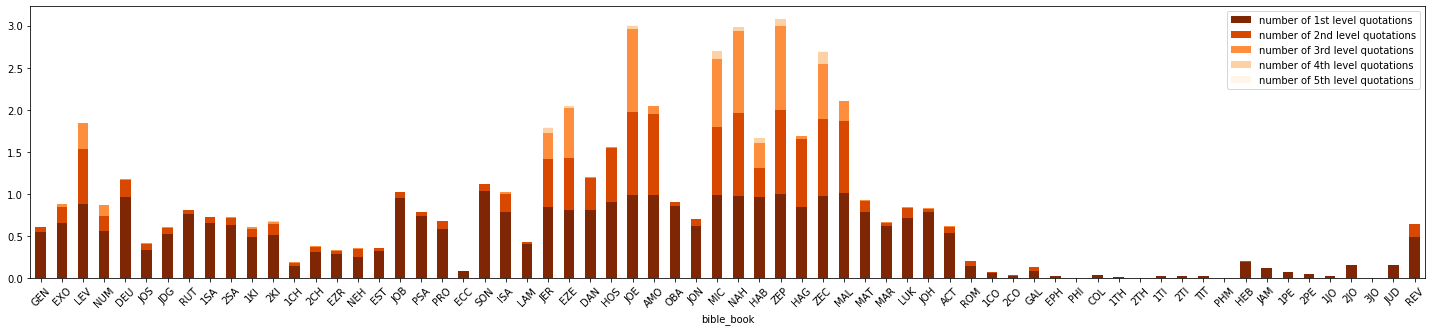

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

rel_books_df.plot(kind="bar", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], stacked = True, figsize=(25,5), cmap="Oranges_r", rot=45, ax = axes)
#plt.xticks(relative_quantitative_data["id"].tolist())
#axes.tick_params(axis='x', which='minor', bottom=True)
#axes.tick_params(axis='x', which='major', bottom=True)

fig.savefig("./../../../visualizations/features/stacked_bars_levels_quotations_bible.png")



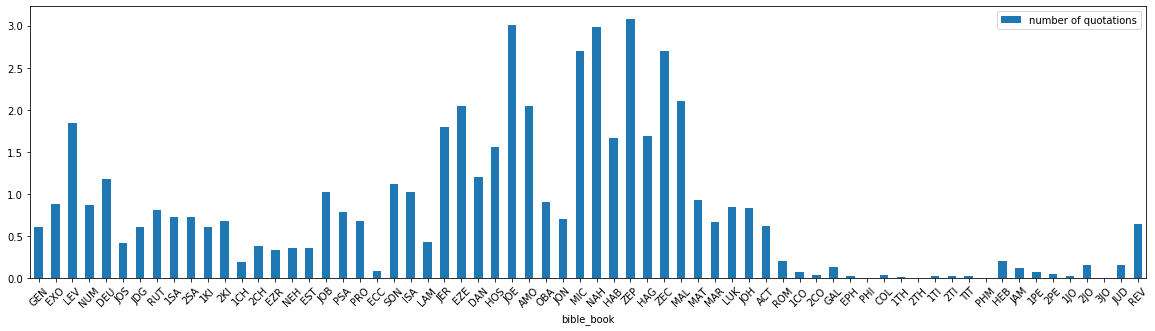

In [37]:
rel_books_df.plot(kind="bar", y=['number of quotations'], figsize=(20,5), rot=45)
#plt.xticks(relative_quantitative_data["id"].tolist())
plt.savefig("./../../../visualizations/features/bars_quotations.png")


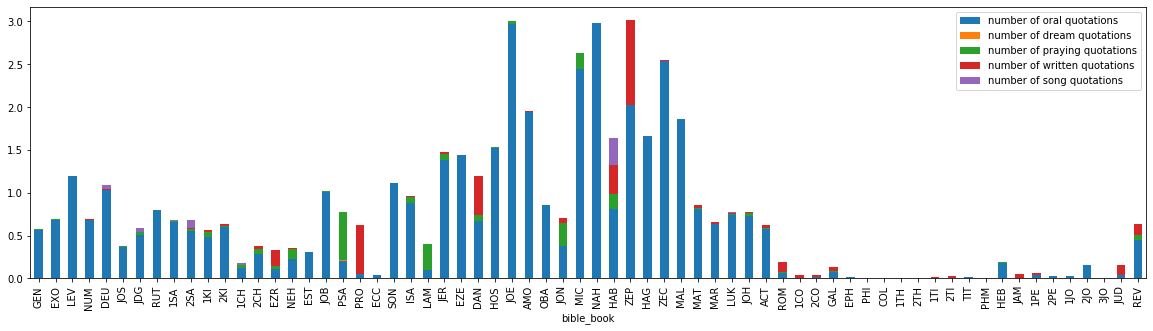

In [38]:
rel_books_df.plot(kind="bar",  y=['number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of written quotations',
 'number of song quotations'
 ], stacked=True, figsize=(20,5))

plt.savefig("./../../../visualizations/features/stacked_bars_types_quotations_selected.png")


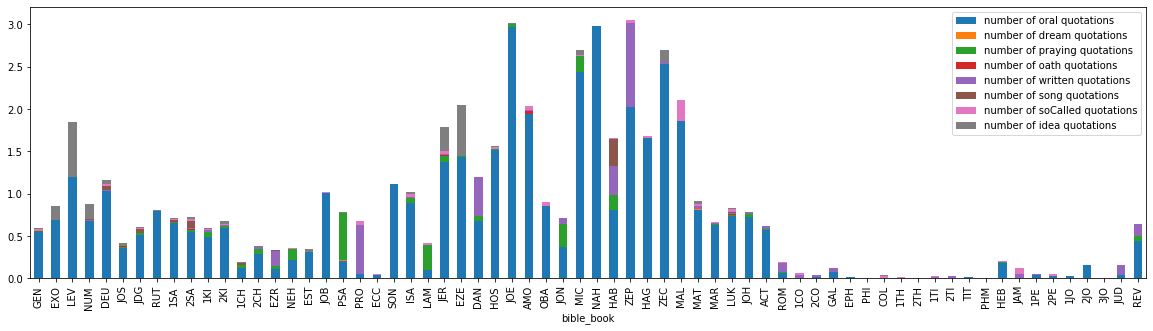

In [39]:
rel_books_df.plot(kind="bar", y=['number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'number of song quotations',
 'number of soCalled quotations',
 'number of idea quotations'], stacked=True, figsize=(20,5))

plt.savefig("./../../../visualizations/features/stacked_bars_types_quotations.png")


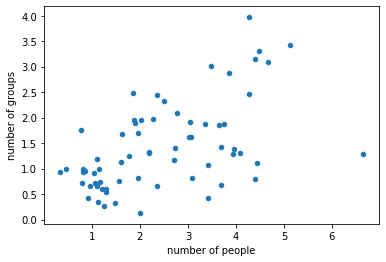

In [40]:
rel_books_df.plot.scatter(x="number of people",y="number of groups")

In [41]:
structural_features

['number of entities referred',
 'number of different entities referred',
 'number of people',
 'number of different number of people',
 'number of groups',
 'number of different number of groups',
 'number of places',
 'number of different number of places',
 'number of times',
 'number of different number of times',
 'number of works',
 'number of different number of works',
 'number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations',
 'number of 6th level quotations',
 'number of 7th level quotations',
 'number of quotations',
 'number of entities communicating',
 'number of different entities communicating',
 'number of entities receiving communication',
 'number of different entities receiving communication',
 'number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'num

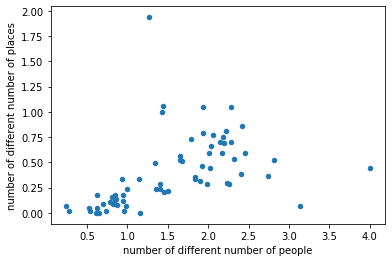

In [42]:
rel_books_df.plot.scatter(x="number of different number of people",y="number of different number of places")

In [43]:
import seaborn as sb

In [44]:
rel_books_df.loc["MAT"][structural_features].sort_values(ascending=False)

number of entities referred                             4.240896
number of different entities referred                   3.295051
number of groups                                        1.958917
number of people                                        1.874883
number of different number of groups                    1.543417
number of different number of people                    1.401494
number of entities receiving communication              1.118581
number of different entities receiving communication    1.090570
number of entities communicating                        0.935574
number of quotations                                    0.925303
number of different entities communicating              0.909430
number of oral quotations                               0.809524
number of 1st level quotations                          0.782446
number of places                                        0.342670
number of different number of places                    0.288515
number of 2nd level quota

In [45]:
2+2

4

In [46]:
df.loc[df["bible_identifier"] == "b.MAT.001.021"]

bible_identifier bible_book bible_chapter bible_book_chapter   genre  \
23165    b.MAT.001.021        MAT           001            MAT.001  gospel   

       twitter_freq_sum_2014_2015  twitter_freq_2014  twitter_freq_2015  \
23165                       17099               9944               7155   

       relations  monogamy  ...  #org35  #org439  #pla65  #pla68  #per116  \
23165          0         0  ...     0.0      0.0     0.0     0.0      0.0   

       #per119  #pla67  #org52  #per129  #pla74  
23165      0.0     0.0     0.0      0.0     0.0  

[1 rows x 4167 columns]

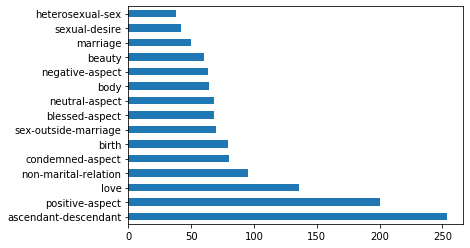

In [47]:
books_df[sexual_features].sum().sort_values(ascending=False)[0:15].plot.barh()

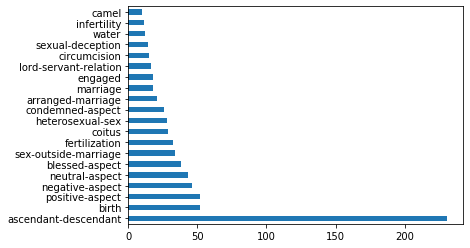

In [48]:
books_df.loc["GEN"][sexual_features].sort_values(ascending=False)[0:20].plot.barh()

In [49]:
books_df.loc["EXO"][sexual_features].sum().sum()

0.0

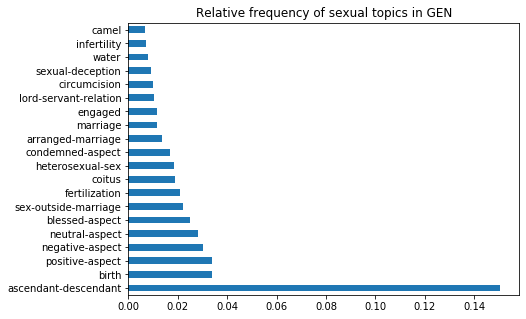

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
rel_books_df.loc["GEN"][sexual_features].sort_values(ascending=False)[0:20].plot.barh(ax=axes)    
axes.set_title("Relative frequency of sexual topics in GEN")
fig.savefig("./../../../visualizations/features/bar_sexual_topics_GEN.png")

fig.show()


GEN
RUT
SON
MAT
JOH
1CO
REV


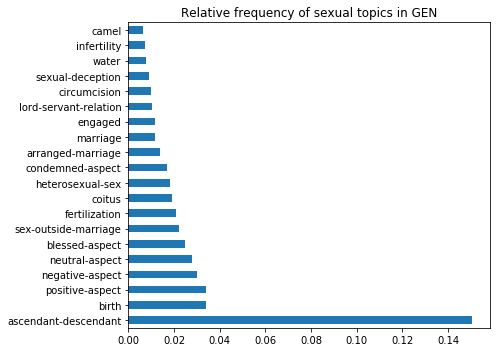

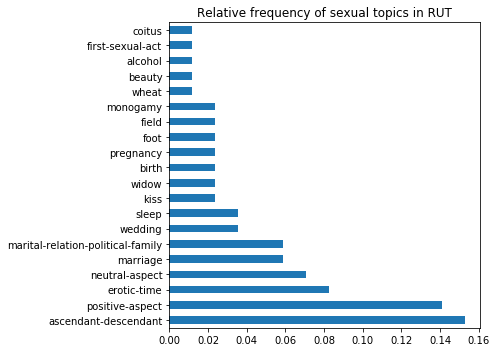

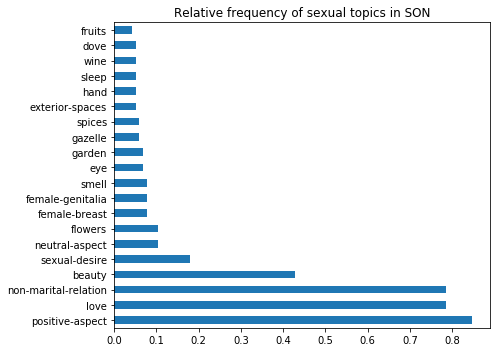

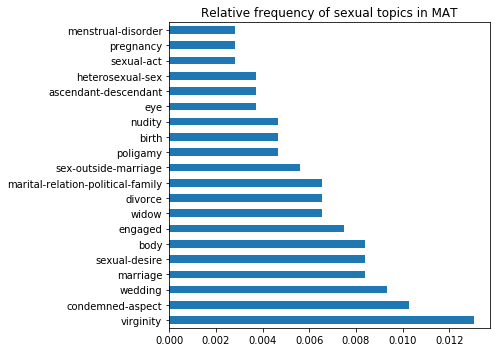

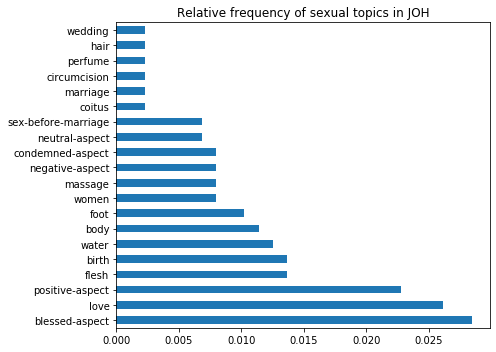

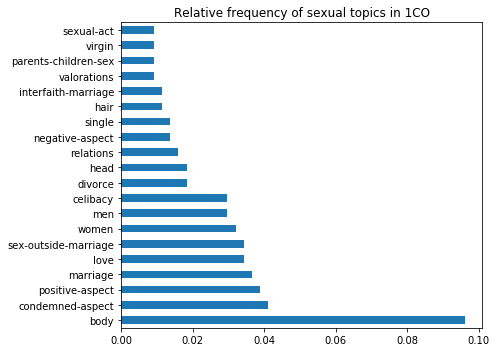

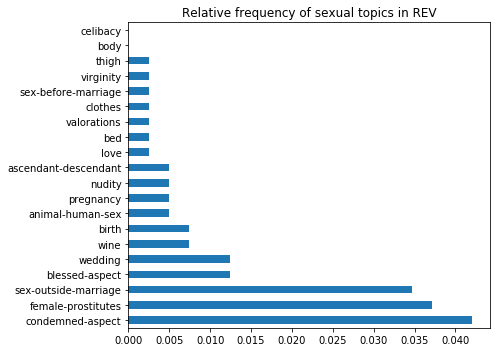

In [51]:
for book in books_df.index.tolist():

    if books_df.loc[book][sexual_features].sum().sum() > 0:
        print(book)

        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
        rel_books_df.loc[book][sexual_features].sort_values(ascending=False)[0:20].plot.barh(ax=axes)    
        axes.set_title("Relative frequency of sexual topics in " + book)
        plt.tight_layout()
        fig.savefig("./../../../visualizations/features/bar_sexual_topics_rel_" + book + ".png")
        fig.show()

GEN
RUT
SON
MAT
JOH
1CO
REV


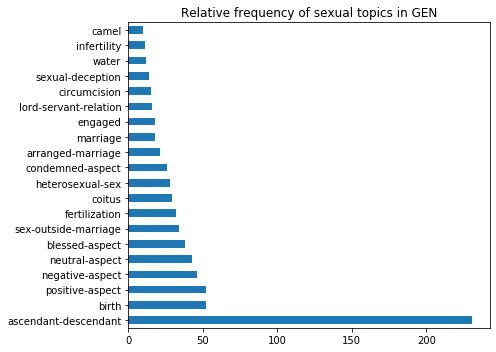

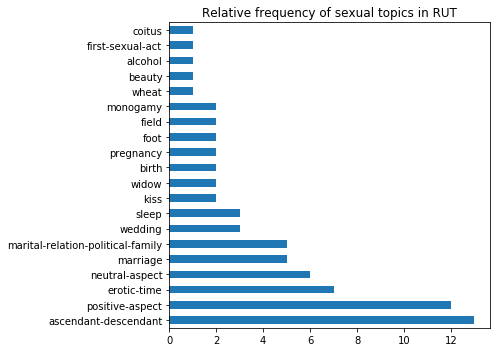

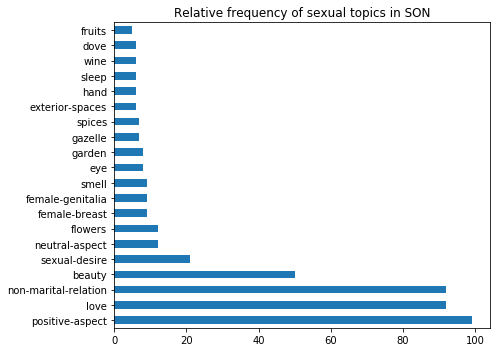

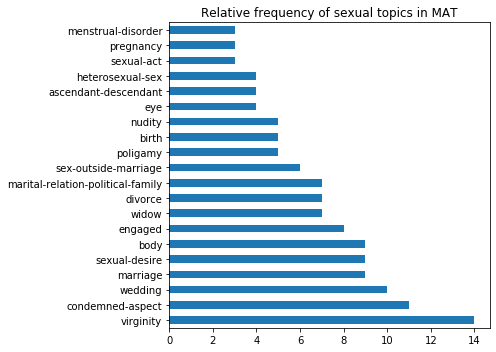

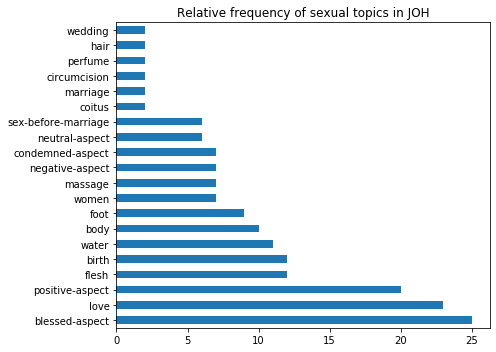

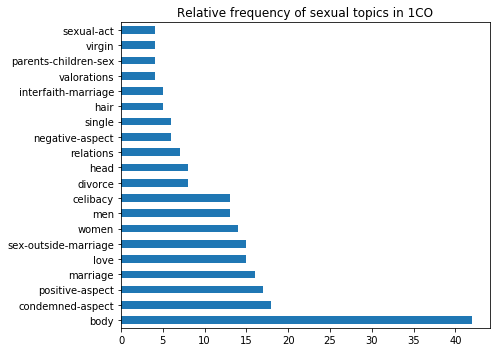

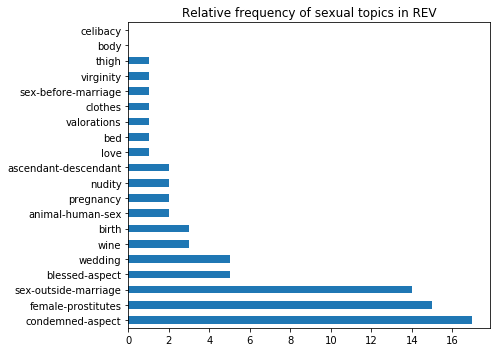

In [52]:
for book in books_df.index.tolist():

    if books_df.loc[book][sexual_features].sum().sum() > 0:
        print(book)

        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
        books_df.loc[book][sexual_features].sort_values(ascending=False)[0:20].plot.barh(ax=axes)    
        axes.set_title("Relative frequency of sexual topics in " + book)
        plt.tight_layout()
        fig.savefig("./../../../visualizations/features/bar_sexual_topics_" + book + ".png")
        fig.show()

In [53]:
rel_books_df.loc["MAT"][entities_features].sort_values(ascending=False)[0:20].index.tolist()

['#per1',
 '#org0',
 '#org3',
 '#per14',
 '#org2',
 '#org18',
 '#per21',
 '#org5',
 '#org12',
 '#org19',
 '#org15',
 '#org25',
 '#pla19',
 '#pla18',
 '#per18',
 '#per50',
 '#org6',
 '#org4',
 '#org8',
 '#per23']

In [54]:
entities_df

order      id    NormalizedName-sp aclaration variants comments book  \
id                                                                              
#per0      2.0   #per0  persona no definida        NaN      NaN      NaN   NT   
#per1      3.0   #per1                Jesús        NaN      NaN      NaN   NT   
#per2      4.0   #per2              Abraham        NaN    Abram      NaN   AT   
#per3      5.0   #per3                Isaac        NaN      NaN      NaN   AT   
#per4      6.0   #per4                Jacob        NaN   Israel      NaN   AT   
...        ...     ...                  ...        ...      ...      ...  ...   
#wor17  3985.0  #wor17      libro de Isaías        NaN      NaN      NaN  NaN   
#wor18  3986.0  #wor18   libros de Lamentos        NaN      NaN      NaN  NaN   
#ani0   3987.0   #ani0             animales        NaN      NaN      NaN  NaN   
#thin0  3988.0  #thin0                 cosa        NaN      NaN      NaN  NaN   
#thin1  3989.0  #thin1       asno de Balaam        NaN      NaN      NaN  NaN   

       cert wikidata id cert_wikidata  ...   PHM   HEB  JAM   1PE   2PE   1JO  \
id                                     ...                                      
#per0   NaN         NaN           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   
#per1   NaN        Q302           NaN  ...  13.0  75.0  5.0  34.0  24.0  48.0   
#per2   NaN       Q9181           NaN  ...   0.0  13.0  4.0   2.0   0.0   0.0   
#per3   NaN     Q671872           NaN  ...   0.0   7.0  2.0   0.0   0.0   0.0   
#per4   NaN     Q289957           NaN  ...   0.0   5.0  0.0   0.0   0.0   1.0   
...     ...         ...           ...  ...   ...   ...  ...   ...   ...   ...   
#wor17  NaN           0           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   
#wor18  NaN           0           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   
#ani0   NaN           0           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   
#thin0  NaN           0           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   
#thin1  NaN           0           NaN  ...   0.0   0.0  0.0   0.0   0.0   0.0   

        2JO  3JO  JUD    REV  
id                            
#per0   0.0  0.0  0.0    0.0  
#per1   7.0  0.0  8.0  102.0  
#per2   0.0  0.0  0.0    0.0  
#per3   0.0  0.0  0.0    0.0  
#per4   0.0  0.0  0.0    0.0  
...     ...  ...  ...    ...  
#wor17  0.0  0.0  0.0    0.0  
#wor18  0.0  0.0  0.0    0.0  
#ani0   0.0  0.0  0.0    0.0  
#thin0  0.0  0.0  0.0    0.0  
#thin1  0.0  0.0  0.0    0.0  

[3989 rows x 94 columns]

In [55]:
#entities_df.values.max()

In [56]:
[entity for entity in rel_books_df.loc["GEN"][entities_features].sort_values(ascending=False)[0:100].index.tolist() if ("org" in               entity or "per" in entity ) and "per0" not in entity ]

['#per4',
 '#per14',
 '#per104',
 '#per2',
 '#org88',
 '#per3',
 '#per131',
 '#per132',
 '#per133',
 '#per134',
 '#per136',
 '#org83',
 '#per5',
 '#per16',
 '#org0',
 '#org4',
 '#per135',
 '#per47',
 '#per137',
 '#per128',
 '#per138',
 '#per158',
 '#per145',
 '#per144',
 '#per109',
 '#per159',
 '#per140',
 '#per162',
 '#per143',
 '#org78',
 '#per241',
 '#org65',
 '#per139',
 '#per161',
 '#per142',
 '#per150',
 '#per195',
 '#per6',
 '#org63',
 '#per124',
 '#per189',
 '#per72',
 '#per157',
 '#per152',
 '#per267',
 '#per173',
 '#org80',
 '#per125',
 '#per149',
 '#org94',
 '#org84',
 '#per156',
 '#per43',
 '#org53',
 '#per196',
 '#per172',
 '#org150',
 '#org18',
 '#per181',
 '#per141',
 '#per180',
 '#per126',
 '#per245',
 '#per227',
 '#org86',
 '#per178',
 '#per146',
 '#org79',
 '#per395',
 '#per186',
 '#per20',
 '#per197',
 '#per127',
 '#per148',
 '#per177',
 '#per171',
 '#org85',
 '#per153',
 '#per460',
 '#per160',
 '#per121',
 '#per205',
 '#per169']

In [64]:
def make_heatmap_sexual_entities(rel_books_df, df, entities_df, books = rel_books_df.index.tolist(),
extra_entity = [], nr_entities = 15, nr_topics = 15, figsize = (8,8)):

    for book in books:

        if rel_books_df.loc[book][sexual_features].sum().sum() > 0:
            print(book)
            most_frequent_sexual_topics = rel_books_df.loc[book][sexual_features].sort_values(ascending=False)[0:nr_topics].index.tolist()
            most_frequent_entities = [entity for entity in rel_books_df.loc[book][entities_features].sort_values(ascending=False)[0:nr_entities].index.tolist() if ("org" in               entity or "per" in entity ) and "per0" not in entity ]
            most_frequent_entities += extra_entity


            coappereance_df = pd.DataFrame(index = most_frequent_sexual_topics, columns = most_frequent_entities)
            for theme in most_frequent_sexual_topics:
                for entity in most_frequent_entities:
                    try:
                        coappereance_df.loc[theme, entity] = (len(df.loc[(df["bible_book"] == book) & (df[theme] > 0) & (df[entity] > 0) ].fillna(0)) / len(df.loc[(df["bible_book"] == book) & (df[entity] > 0) ].fillna(0)) )
                    except:
                        coappereance_df.loc[theme, entity] = 0
            
            #coappereance_df = coappereance_df[coappereance_df.sum().sort_values(ascending=False).index.tolist()]
            coappereance_df = coappereance_df.loc[coappereance_df.sum(axis="columns").sort_values(ascending=False).index.tolist()]
            #coappereance_df.sum().sort_values(ascending=False)




            coappereance_df = coappereance_df.rename(entities_df["NormalizedName-sp"].to_dict(), axis="columns")


            coappereance_df["sum"] = coappereance_df.sum(axis="columns")
            coappereance_df = coappereance_df.T
            coappereance_df["sum"] = coappereance_df.sum(axis="columns")
            coappereance_df = coappereance_df.T


            print(coappereance_df)


            
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize = figsize)

            sns.heatmap(coappereance_df.fillna(0).round(2) * 100, vmin=0, vmax = coappereance_df.iloc[:-1,:-1].values.max() *100, cmap="Reds", ax=axes, robust=True, annot=True, linewidths=.5, fmt='g')
            axes.title.set_text("Heatmap of Coappearence between \nSexual Themes and Entities in " + book + " (in Percentage)")

            for tick in axes.get_xticklabels(): tick.set_rotation(70)
            plt.tight_layout()
            fig.savefig("./../../../visualizations/features/" + book +"_coappearence_sexual_themes_entities_sp.png")


GEN
                            Jacob        Dios        José     Abraham  \
ascendant-descendant    0.0863309    0.138686   0.0422535    0.179104   
positive-aspect         0.0503597    0.026764   0.0211268   0.0335821   
engaged                 0.0191847  0.00729927  0.00352113   0.0223881   
blessed-aspect          0.0143885   0.0754258           0   0.0858209   
negative-aspect         0.0239808   0.0145985   0.0246479   0.0186567   
neutral-aspect          0.0143885   0.0145985  0.00704225   0.0373134   
birth                   0.0383693   0.0291971  0.00704225   0.0223881   
condemned-aspect       0.00239808   0.0218978           0   0.0485075   
marriage               0.00479616  0.00729927           0   0.0149254   
fertilization           0.0167866   0.0389294  0.00704225    0.011194   
coitus                  0.0191847  0.00973236   0.0176056  0.00746269   
sex-outside-marriage   0.00719424  0.00973236   0.0211268   0.0186567   
heterosexual-sex        0.0119904  0.00729927  

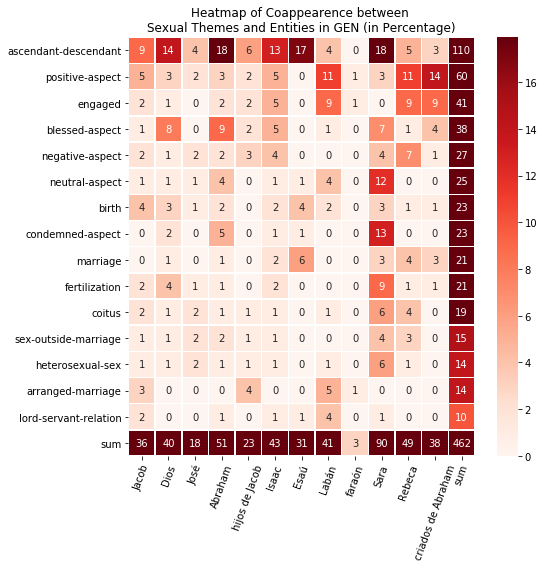

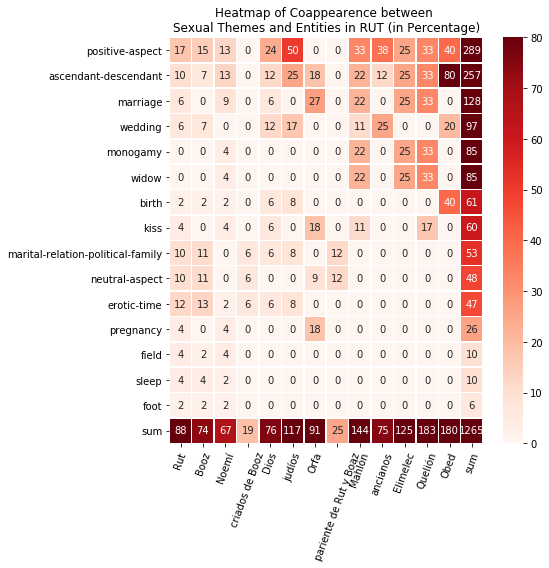

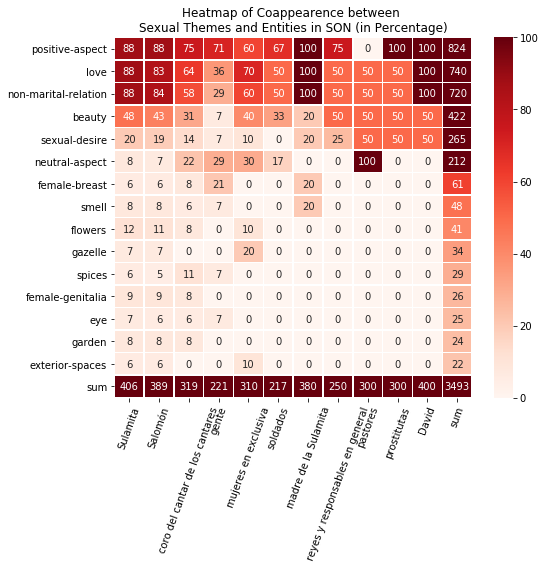

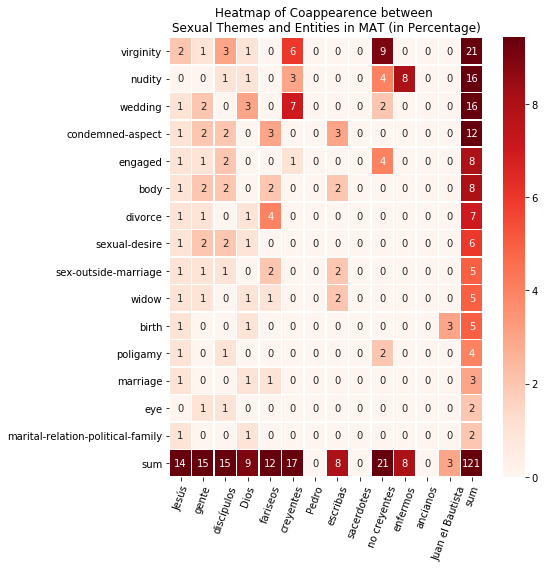

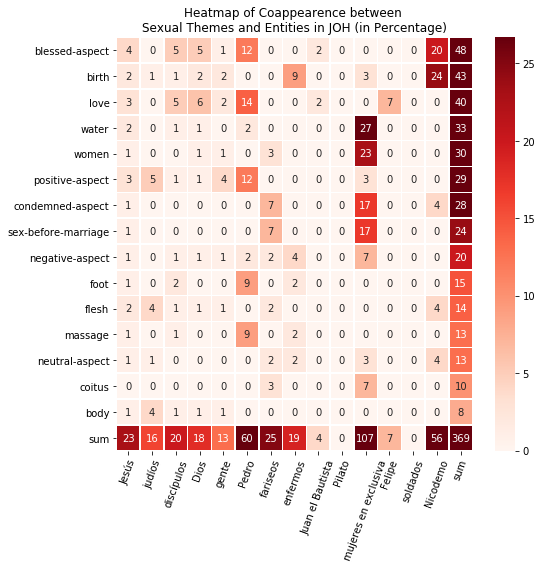

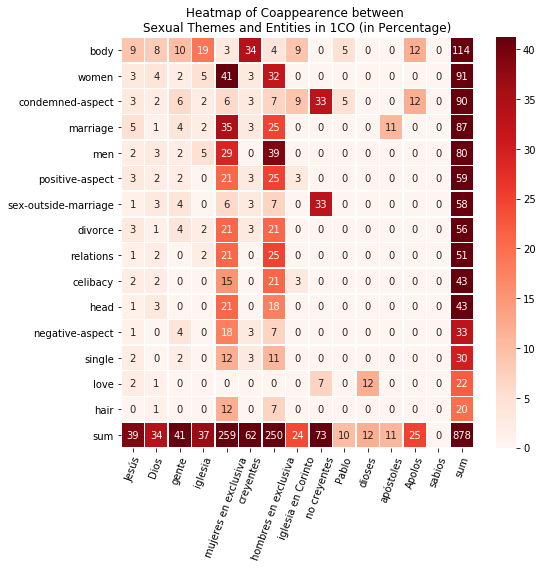

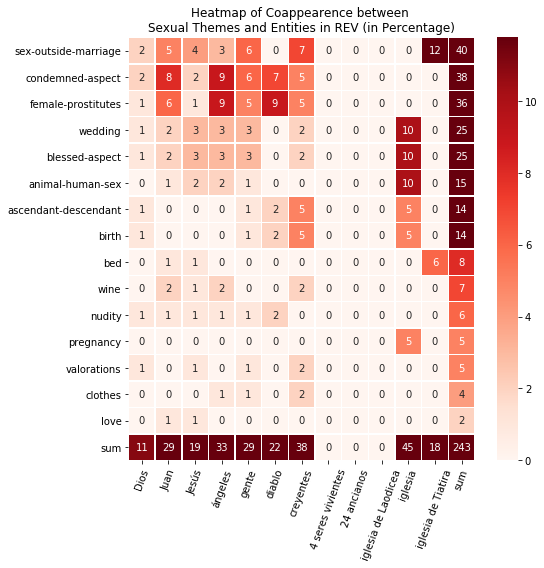

In [65]:
make_heatmap_sexual_entities(rel_books_df, df, entities_df)

MAT
                                        Jesús       gente discípulos  \
virginity                           0.0166074   0.0124378      0.026   
nudity                             0.00474496           0      0.008   
wedding                             0.0118624   0.0199005      0.002   
condemned-aspect                    0.0130486   0.0248756      0.022   
birth                               0.0059312  0.00497512      0.002   
engaged                            0.00948992  0.00746269      0.016   
body                                0.0106762   0.0199005      0.018   
divorce                            0.00830368  0.00746269      0.004   
sexual-desire                       0.0106762   0.0174129      0.018   
sex-outside-marriage               0.00711744  0.00746269      0.006   
widow                              0.00830368  0.00746269      0.002   
poligamy                            0.0059312  0.00497512       0.01   
marriage                            0.0106762  0.00497512   

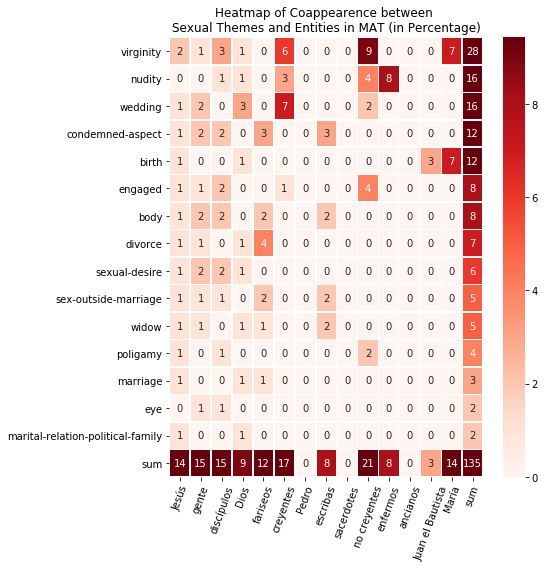

In [66]:
make_heatmap_sexual_entities(rel_books_df, df, entities_df, books = ["MAT"], extra_entity=["#per11"], )